In [1]:
import sys
sys.version

import exoplanet
print(f"exoplanet.__version__ = '{exoplanet.__version__}'")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
from astropy import units as u
from astropy.constants import M_earth, M_sun
#from simulate import *
#from model import *
import arviz
import pickle
from collections import defaultdict

import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)


exoplanet.__version__ = '0.5.1'


In [2]:
folder = './traces/Jan27/fixed_periods/'


files = [
    'period4327_inc45_gaia60_roman5_5_100gaia.cdf',
    'period4327_inc45_gaia60_roman5_5_200gaia.cdf',
    'period4327_inc45_gaia60_roman5_10_100gaia.cdf',
    'period4327_inc45_gaia60_roman5_10_200gaia.cdf',
    
    'period4327_inc45_gaia60_roman10_5_100gaia.cdf',
    'period4327_inc45_gaia60_roman10_5_200gaia.cdf',
    'period4327_inc45_gaia60_roman10_10_100gaia.cdf',
    'period4327_inc45_gaia60_roman10_10_200gaia.cdf',
    
    'period4327_inc45_gaia60_roman20_5_100gaia.cdf',
    'period4327_inc45_gaia60_roman20_5_200gaia.cdf',
    'period4327_inc45_gaia60_roman20_10_100gaia.cdf',
    'period4327_inc45_gaia60_roman20_10_200gaia.cdf',
    
    'period4327_inc45_gaia60_romanNA_100gaia.cdf',
    'period4327_inc45_gaia60_romanNA_200gaia.cdf',
    'period4327_inc45_gaia60_romanNA_100gaia.cdf',
    'period4327_inc45_gaia60_romanNA_200gaia.cdf'
]




    



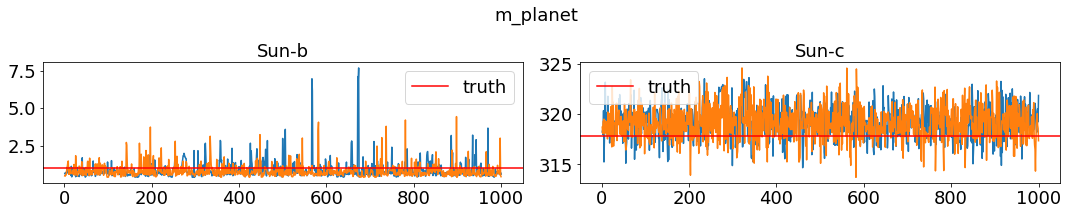

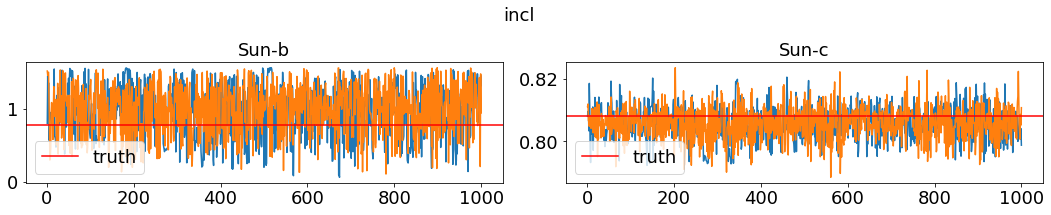

In [3]:


trace = arviz.from_netcdf(folder+files[0])


parameters = ["m_planet", "incl"]

m_sun = 333030 #earth masses

P_earth = 300
e_earth = 0.0167
Tper_earth= 100
omega_earth = np.radians(102.9)
Omega_earth = np.radians(0.0)
inclination_earth = np.radians(45.0)
m_earth = 1./m_sun #units m_sun


P_jup = 4327
e_jup = 0.0484
Tper_jup = 500
omega_jup = np.radians(274.3) - 2*np.pi
Omega_jup = np.radians(100.4)
inclination_jup = np.radians(1.31) + inclination_earth
m_jup = 317.83/m_sun #units m_sun



truth_chain_plot = [m_earth*m_sun, m_jup*m_sun, inclination_earth, inclination_jup]
for ii in range(0, len(parameters)):
    plot_truth = False
    param = parameters[ii]
    
    true_vals_earth = truth_chain_plot[2*ii]
    true_vals_jup = truth_chain_plot[2*ii+1]
    plot_truth = True
    
    fig, ax = plt.subplots(1,2, figsize = (15,3))
    planet1_chain1 = trace.posterior[param].values[:, :, 0][0]
    planet1_chain2 = trace.posterior[param].values[:, :, 0][1]
    
    planet2_chain1 = trace.posterior[param].values[:, :, 1][0]
    planet2_chain2 = trace.posterior[param].values[:, :, 1][1]
    
    
    nstep = np.arange(1, len(planet1_chain1)+1, 1)
    
    
    ax[0].plot(nstep, planet1_chain1)
    ax[0].plot(nstep, planet1_chain2)
    
    if plot_truth:
        ax[0].axhline(y=true_vals_earth, color = 'r', label = 'truth')
    ax[0].set_title("Sun-b", fontsize = 18)
    ax[0].legend(fontsize = 18)
    
    ax[1].plot(nstep, planet2_chain1)
    ax[1].plot(nstep, planet2_chain2)
    
    if plot_truth:
        ax[1].axhline(y=true_vals_jup, color = 'r', label = 'truth')
    ax[1].set_title("Sun-c", fontsize = 18)
    ax[1].legend(fontsize = 18)

    fig.suptitle(param, fontsize = 18)
    fig.tight_layout()
    plt.show()

In [4]:
#periods = [1000., 4327.631, 10000.]
#incs = [10., 45., 80.]
#roman_errs = [5e-6, 10e-6, 20e-6, None]

periods_jup = [4327] #days
incs_earth = [45.] #degrees
roman_errs = [5e-6, 10e-6, 20e-6, None] #micro-as
roman_durations = [5, 10] #years
gaia_obs = [100, 200] #number of observations with Gaia


index = -1
params_earth = defaultdict(list)
params_jup = defaultdict(list)
params_earth_err = defaultdict(list)
params_jup_err = defaultdict(list)
#for inc in incs_earth:
    #for period in periods_jup:
        #for roman_err in roman_errs:
            #for roman_duration in roman_durations:
                #for gaia_ob in gaia_obs:
                    #index += 1
                    #file = files[index]
                    
                    
for file in files:     

    trace = arviz.from_netcdf(folder+file)


    parameters = ["m_planet"]

    print('start')
    print(file)
    print('--------')
    #print('Jupiter period: ' + str(int(period)))
    #print('Earth inclination: ' + str(int(inc)))

    #if roman_err is not None:
    #    print('Roman precision: ' + str(int(1e6*roman_err)))
    #    print('Roman duration: ' + str(int(roman_duration)))
    #else:
    #    print('Roman precision: N/A')
    #    print('Roman duration: N/A')

    #print('Gaia Obs: ' + str(int(gaia_ob)))

    #print("")
    #print("")
    #print("")
    for param in parameters:


        planet1_med = np.median(trace.posterior[param].values[:, :, 0])
        planet2_med = np.median(trace.posterior[param].values[:, :, 1])

        planet1_quantile = [np.quantile(trace.posterior[param].values[:, :, 0], 0.16),
                            np.quantile(trace.posterior[param].values[:, :, 0], 0.84)]

        planet2_quantile = [np.quantile(trace.posterior[param].values[:, :, 1], 0.16),
                            np.quantile(trace.posterior[param].values[:, :, 1], 0.84)]

        planet1_err = np.array([
            [planet1_med - planet1_quantile[0]  ],
            [planet1_quantile[1] - planet1_med]
        ])

        planet2_err = np.array([
            [planet2_med - planet2_quantile[0]  ],
            [planet2_quantile[1] - planet2_med]
        ])

        print(param + "_earth: " + str(planet1_med) + " -/+ " + str(planet1_err))
        print(param + "_jup: " + str(planet2_med) + "-/+" + str(planet2_err))

        params_earth[param].append(planet1_med)
        params_jup[param].append(planet2_med)

        params_earth_err[param].append(planet1_err)
        params_jup_err[param].append(planet2_err)

        print("")
        print("")






start
period4327_inc45_gaia60_roman5_5_100gaia.cdf
--------
m_planet_earth: 0.6863495781239783 -/+ [[0.18560217]
 [0.37018882]]
m_planet_jup: 319.12255972507353-/+[[1.65095871]
 [1.67829894]]


start
period4327_inc45_gaia60_roman5_5_200gaia.cdf
--------
m_planet_earth: 0.8473313830547287 -/+ [[0.19587189]
 [0.5097258 ]]
m_planet_jup: 317.4302862539797-/+[[1.7045986]
 [1.5684832]]


start
period4327_inc45_gaia60_roman5_10_100gaia.cdf
--------
m_planet_earth: 0.9450620456006371 -/+ [[0.20883823]
 [0.70691858]]
m_planet_jup: 318.4758189377579-/+[[1.15968947]
 [1.19191939]]


start
period4327_inc45_gaia60_roman5_10_200gaia.cdf
--------
m_planet_earth: 0.8007607467497649 -/+ [[0.17852385]
 [0.46803629]]
m_planet_jup: 318.30273975097737-/+[[1.16565551]
 [1.28705368]]


start
period4327_inc45_gaia60_roman10_5_100gaia.cdf
--------
m_planet_earth: 0.9813362140863 -/+ [[0.20046726]
 [0.64386148]]
m_planet_jup: 320.3073628864645-/+[[3.28285057]
 [3.3085369 ]]


start
period4327_inc45_gaia60_roman

In [31]:
'''
from pylab import *

cmap = cm.get_cmap('winter', len(files))    # PiYG

colors = []
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))
    
    
ys = np.linspace(1, 0, len(files))
'''


"\nfrom pylab import *\n\ncmap = cm.get_cmap('winter', len(files))    # PiYG\n\ncolors = []\nfor i in range(cmap.N):\n    rgba = cmap(i)\n    # rgb2hex accepts rgb or rgba\n    colors.append(matplotlib.colors.rgb2hex(rgba))\n    \n    \nys = np.linspace(1, 0, len(files))\n"

In [5]:
colors = [
    "#1c245f", "#1c245f", 
    "#1c245f", "#1c245f",
    "#530031", "#530031", 
    "#530031", "#530031",
    "#ffc052", "#ffc052", 
    "#ffc052", "#ffc052", 
    "#01792d", "#01792d",
    "#01792d", "#01792d"]


In [32]:
noRoman_100gaia_earth_errs = np.array([[0.18815669], [0.38577925]])
noRoman_200gaia_earth_errs = np.array([[0.20374645], [0.52750432]])

noRoman_100gaia_jup_errs   = np.array([[6.6178964 ], [7.39989298]])
noRoman_200gaia_jup_errs   = np.array([[4.55936176], [4.8645505 ]])


Gaia_200 = 4.25
Gaia_100 = 6
Roman5_10yr = 0.79
Roman5_5yr = 1.12


Gaia_200_to_Roman5_10yr =  Roman5_10yr / Gaia_200
Gaia_200_to_Roman5_5yr  =  Roman5_5yr  / Gaia_100
Gaia_100_to_Roman5_10yr =  Roman5_10yr / Gaia_200
Gaia_100_to_Roman5_5yr  =  Roman5_5yr  / Gaia_100

expected_earth_err_Gaia_200_to_Roman5_10yr = Gaia_200_to_Roman5_10yr * noRoman_200gaia_earth_errs
expected_earth_err_Gaia_200_to_Roman5_5yr  = Gaia_200_to_Roman5_5yr  * noRoman_200gaia_earth_errs
expected_earth_err_Gaia_100_to_Roman5_10yr = Gaia_100_to_Roman5_10yr * noRoman_100gaia_earth_errs
expected_earth_err_Gaia_100_to_Roman5_5yr  = Gaia_100_to_Roman5_5yr  * noRoman_100gaia_earth_errs


expected_jup_err_Gaia_200_to_Roman5_10yr = Gaia_200_to_Roman5_10yr * noRoman_200gaia_jup_errs
expected_jup_err_Gaia_200_to_Roman5_5yr  = Gaia_200_to_Roman5_5yr  * noRoman_200gaia_jup_errs
expected_jup_err_Gaia_100_to_Roman5_10yr = Gaia_100_to_Roman5_10yr * noRoman_100gaia_jup_errs
expected_jup_err_Gaia_100_to_Roman5_5yr  = Gaia_100_to_Roman5_5yr  * noRoman_100gaia_jup_errs


expected_earth_errs = [expected_earth_err_Gaia_100_to_Roman5_5yr, 
                       expected_earth_err_Gaia_200_to_Roman5_5yr,
                       expected_earth_err_Gaia_100_to_Roman5_10yr,
                       expected_earth_err_Gaia_200_to_Roman5_10yr]

expected_jup_errs =  [expected_jup_err_Gaia_100_to_Roman5_5yr,
                      expected_jup_err_Gaia_200_to_Roman5_5yr,
                      expected_jup_err_Gaia_100_to_Roman5_10yr,
                      expected_jup_err_Gaia_200_to_Roman5_10yr]


<ipython-input-24-619d652a73a5>:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


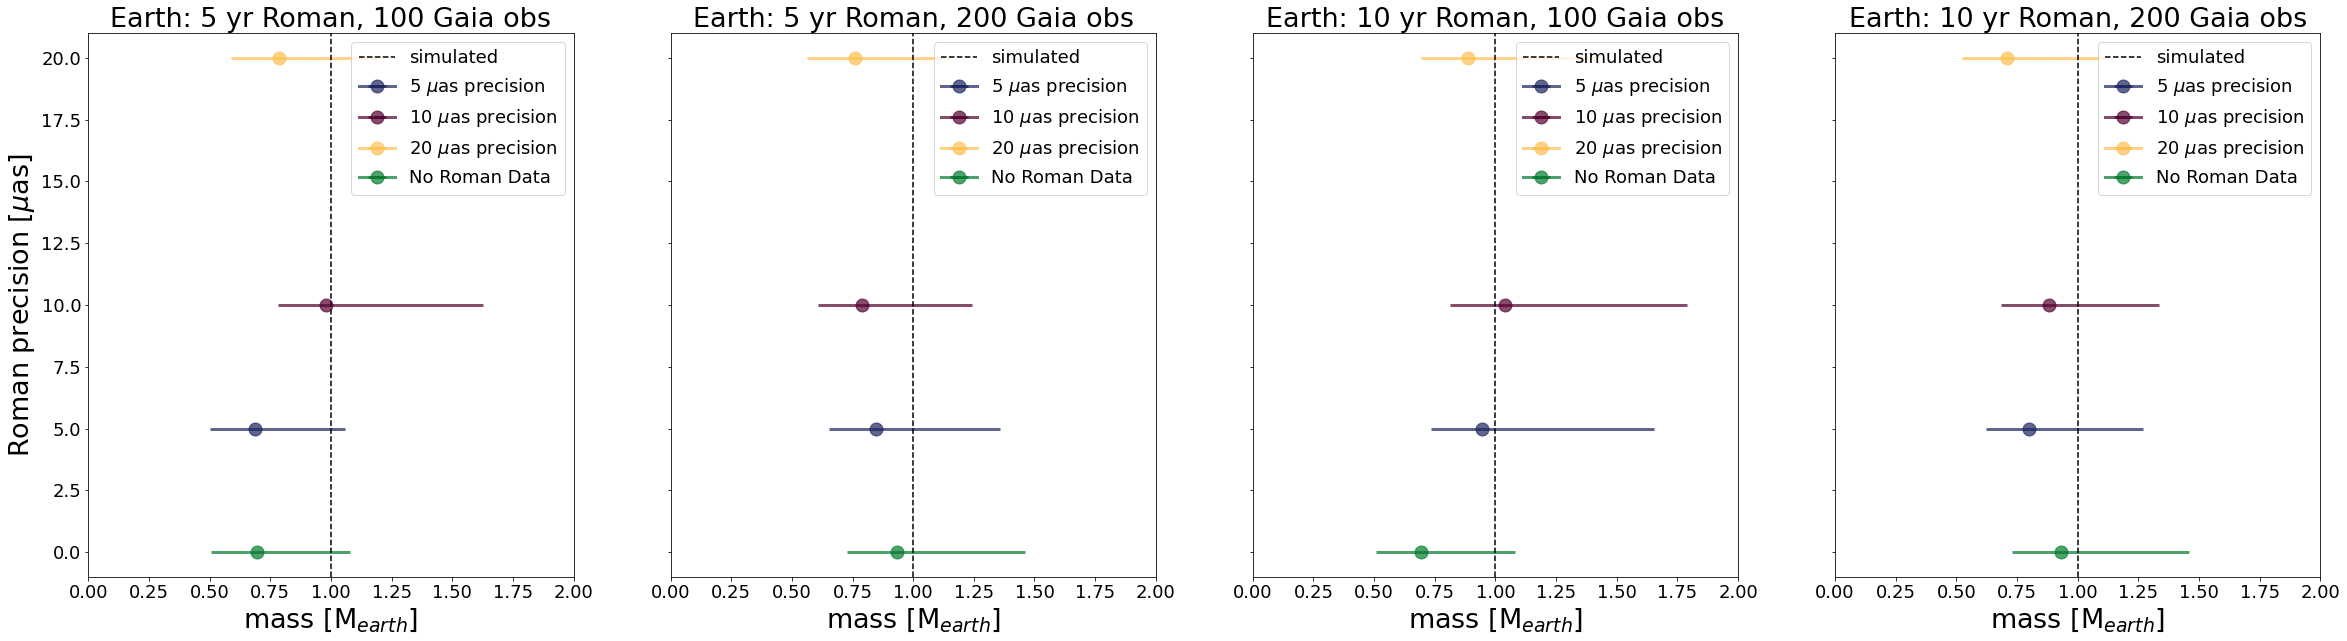

In [24]:
xs = params_earth['m_planet']
xs_err = params_earth_err['m_planet']



roman_errs_quad = [
    r'5 $\mu$as precision', r'5 $\mu$as precision', r'5 $\mu$as precision', r'5 $\mu$as precision',
    
    r'10 $\mu$as precision', r'10 $\mu$as precision', r'10 $\mu$as precision', r'10 $\mu$as precision',
                     
    r'20 $\mu$as precision', r'20 $\mu$as precision', r'20 $\mu$as precision', r'20 $\mu$as precision', 
                     
    'No Roman Data', 'No Roman Data', 'No Roman Data', 'No Roman Data'
                     ]


fig, axs = plt.subplots(1, 4, figsize=[40, 10], sharey=True)

    


plot_index = -1
for ii in range(0, len(files)):
    if plot_index < 3:
        plot_index += 1
    else:
        plot_index = 0
    
    if ii < 4:
        y = 5
        
    elif ii < 8:
        y = 10
        
    elif ii < 12:
        y = 20
        
    elif ii < 16:
        y = 0

    
    x = xs[ii]
    x_err = xs_err[ii]
    #y = ys[ii] + diff
    
    roman_err = roman_errs_quad[ii]
    color = colors[ii]
    
    axs[plot_index].errorbar(x, y, xerr=x_err, marker = 'o', 
                    color = color, label = roman_err, markersize=13,
                   linewidth = 3, alpha = 0.7)

axs[0].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[1].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[2].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[3].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')

#axs[0].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[1].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[2].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[3].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')

xmin, xmax = 0, 2
axs[0].set_xlim(xmin,xmax)
axs[1].set_xlim(xmin,xmax)
axs[2].set_xlim(xmin,xmax)
axs[3].set_xlim(xmin,xmax)

#axs[0].set_ylim(290, 310)

axs[0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[2].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[3].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)

axs[0].set_ylabel(r'Roman precision [$\mu$as]', fontsize = 27)


axs[0].set_title('Earth: 5 yr Roman, 100 Gaia obs', fontsize = 27)
axs[1].set_title('Earth: 5 yr Roman, 200 Gaia obs', fontsize = 27)
axs[2].set_title('Earth: 10 yr Roman, 100 Gaia obs', fontsize = 27)
axs[3].set_title('Earth: 10 yr Roman, 200 Gaia obs', fontsize = 27)

axs[0].legend(fontsize = 18, loc=1)
axs[1].legend(fontsize = 18, loc=1)
axs[2].legend(fontsize = 18, loc=1)
axs[3].legend(fontsize = 18, loc=1)



fig.show()
#fig.savefig('./final_figures/MvP_earth2.pdf')



<ipython-input-28-a44716dfe741>:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


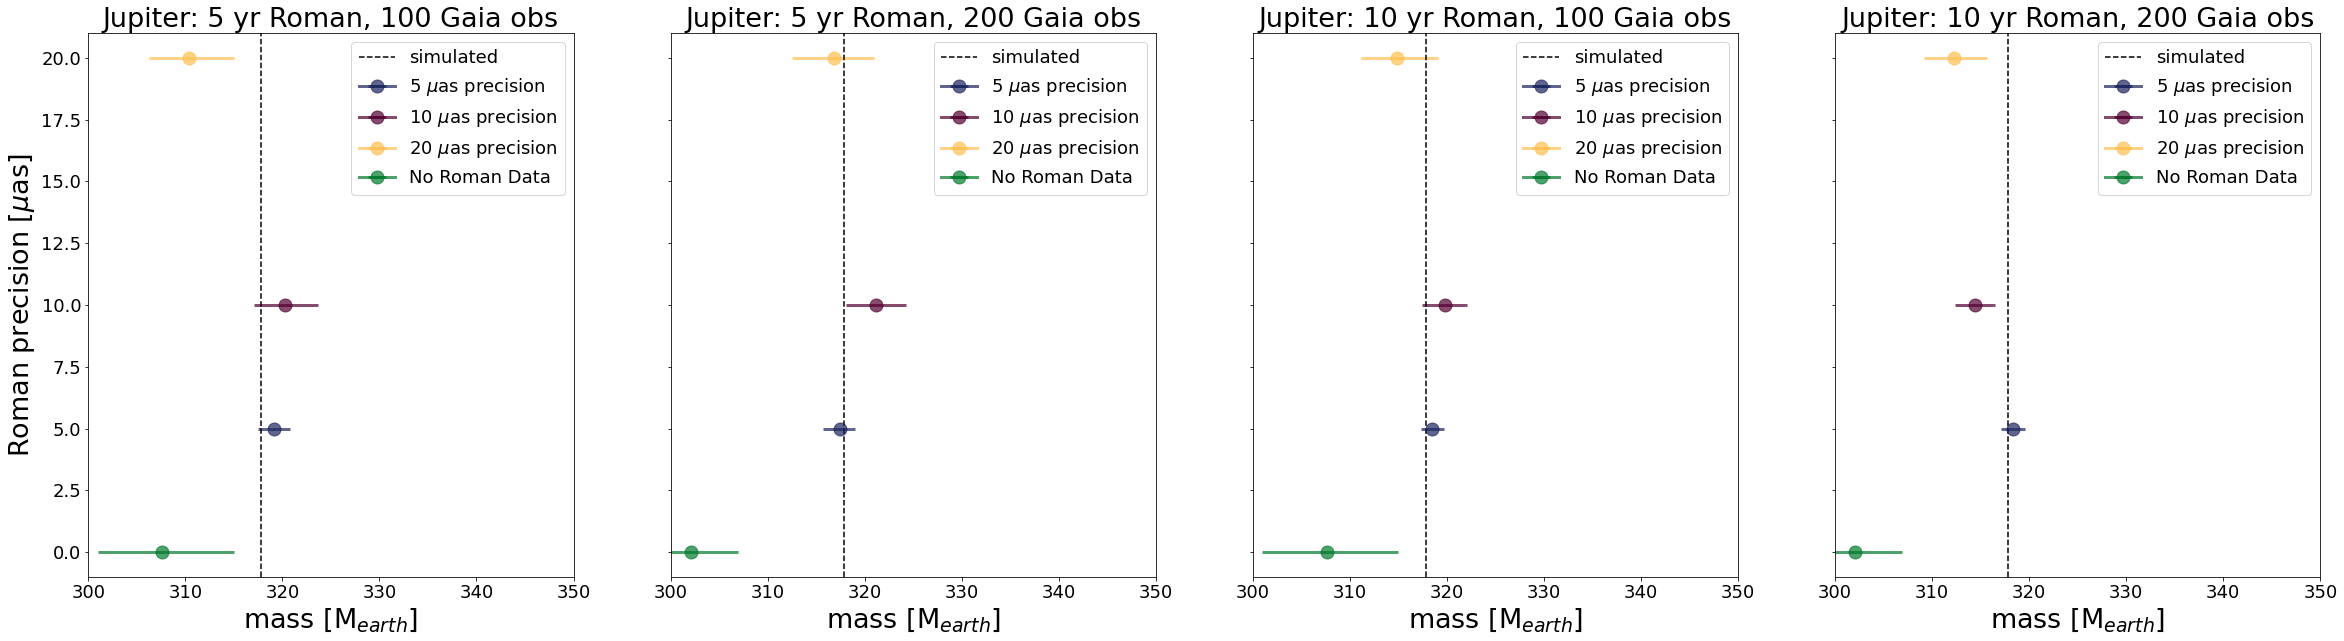

In [28]:
xs = params_jup['m_planet']
xs_err = params_jup_err['m_planet']



roman_errs_quad = [
    r'5 $\mu$as precision', r'5 $\mu$as precision', r'5 $\mu$as precision', r'5 $\mu$as precision',
    
    r'10 $\mu$as precision', r'10 $\mu$as precision', r'10 $\mu$as precision', r'10 $\mu$as precision',
                     
    r'20 $\mu$as precision', r'20 $\mu$as precision', r'20 $\mu$as precision', r'20 $\mu$as precision', 
                     
    'No Roman Data', 'No Roman Data', 'No Roman Data', 'No Roman Data'
                     ]


fig, axs = plt.subplots(1, 4, figsize=[40, 10], sharey=True)


    
plot_index = -1
for ii in range(0, len(files)):
    if plot_index < 3:
        plot_index += 1
    else:
        plot_index = 0
        
        
    if ii < 4:
        y = 5
        
    elif ii < 8:
        y = 10
        
    elif ii < 12:
        y = 20
        
    elif ii < 16:
        y = 0
    
    x = xs[ii]
    x_err = xs_err[ii]
    #y = ys[ii] + diff
    
    roman_err = roman_errs_quad[ii]
    color = colors[ii]
    
    
    axs[plot_index].errorbar(x, y, xerr=x_err, marker = 'o', 
                    color = color, label = roman_err, markersize=13,
                   linewidth = 3, alpha = 0.7)

    

axs[0].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[1].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[2].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[3].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')

#axs[0].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[1].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[2].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[3].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')

xmin, xmax = 300, 350
axs[0].set_xlim(xmin,xmax)
axs[1].set_xlim(xmin,xmax)
axs[2].set_xlim(xmin,xmax)
axs[3].set_xlim(xmin,xmax)

#axs[0].set_ylim(4310, 4340)

axs[0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[2].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[3].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)

axs[0].set_ylabel(r'Roman precision [$\mu$as]', fontsize = 27)


axs[0].set_title('Jupiter: 5 yr Roman, 100 Gaia obs', fontsize = 27)
axs[1].set_title('Jupiter: 5 yr Roman, 200 Gaia obs', fontsize = 27)
axs[2].set_title('Jupiter: 10 yr Roman, 100 Gaia obs', fontsize = 27)
axs[3].set_title('Jupiter: 10 yr Roman, 200 Gaia obs', fontsize = 27)

axs[0].legend(fontsize = 18, loc=1)
axs[1].legend(fontsize = 18, loc=1)
axs[2].legend(fontsize = 18, loc=1)
axs[3].legend(fontsize = 18, loc=1)



fig.show()
#fig.savefig('./final_figures/MvP_earth2.pdf')



<ipython-input-44-d0779d818480>:202: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


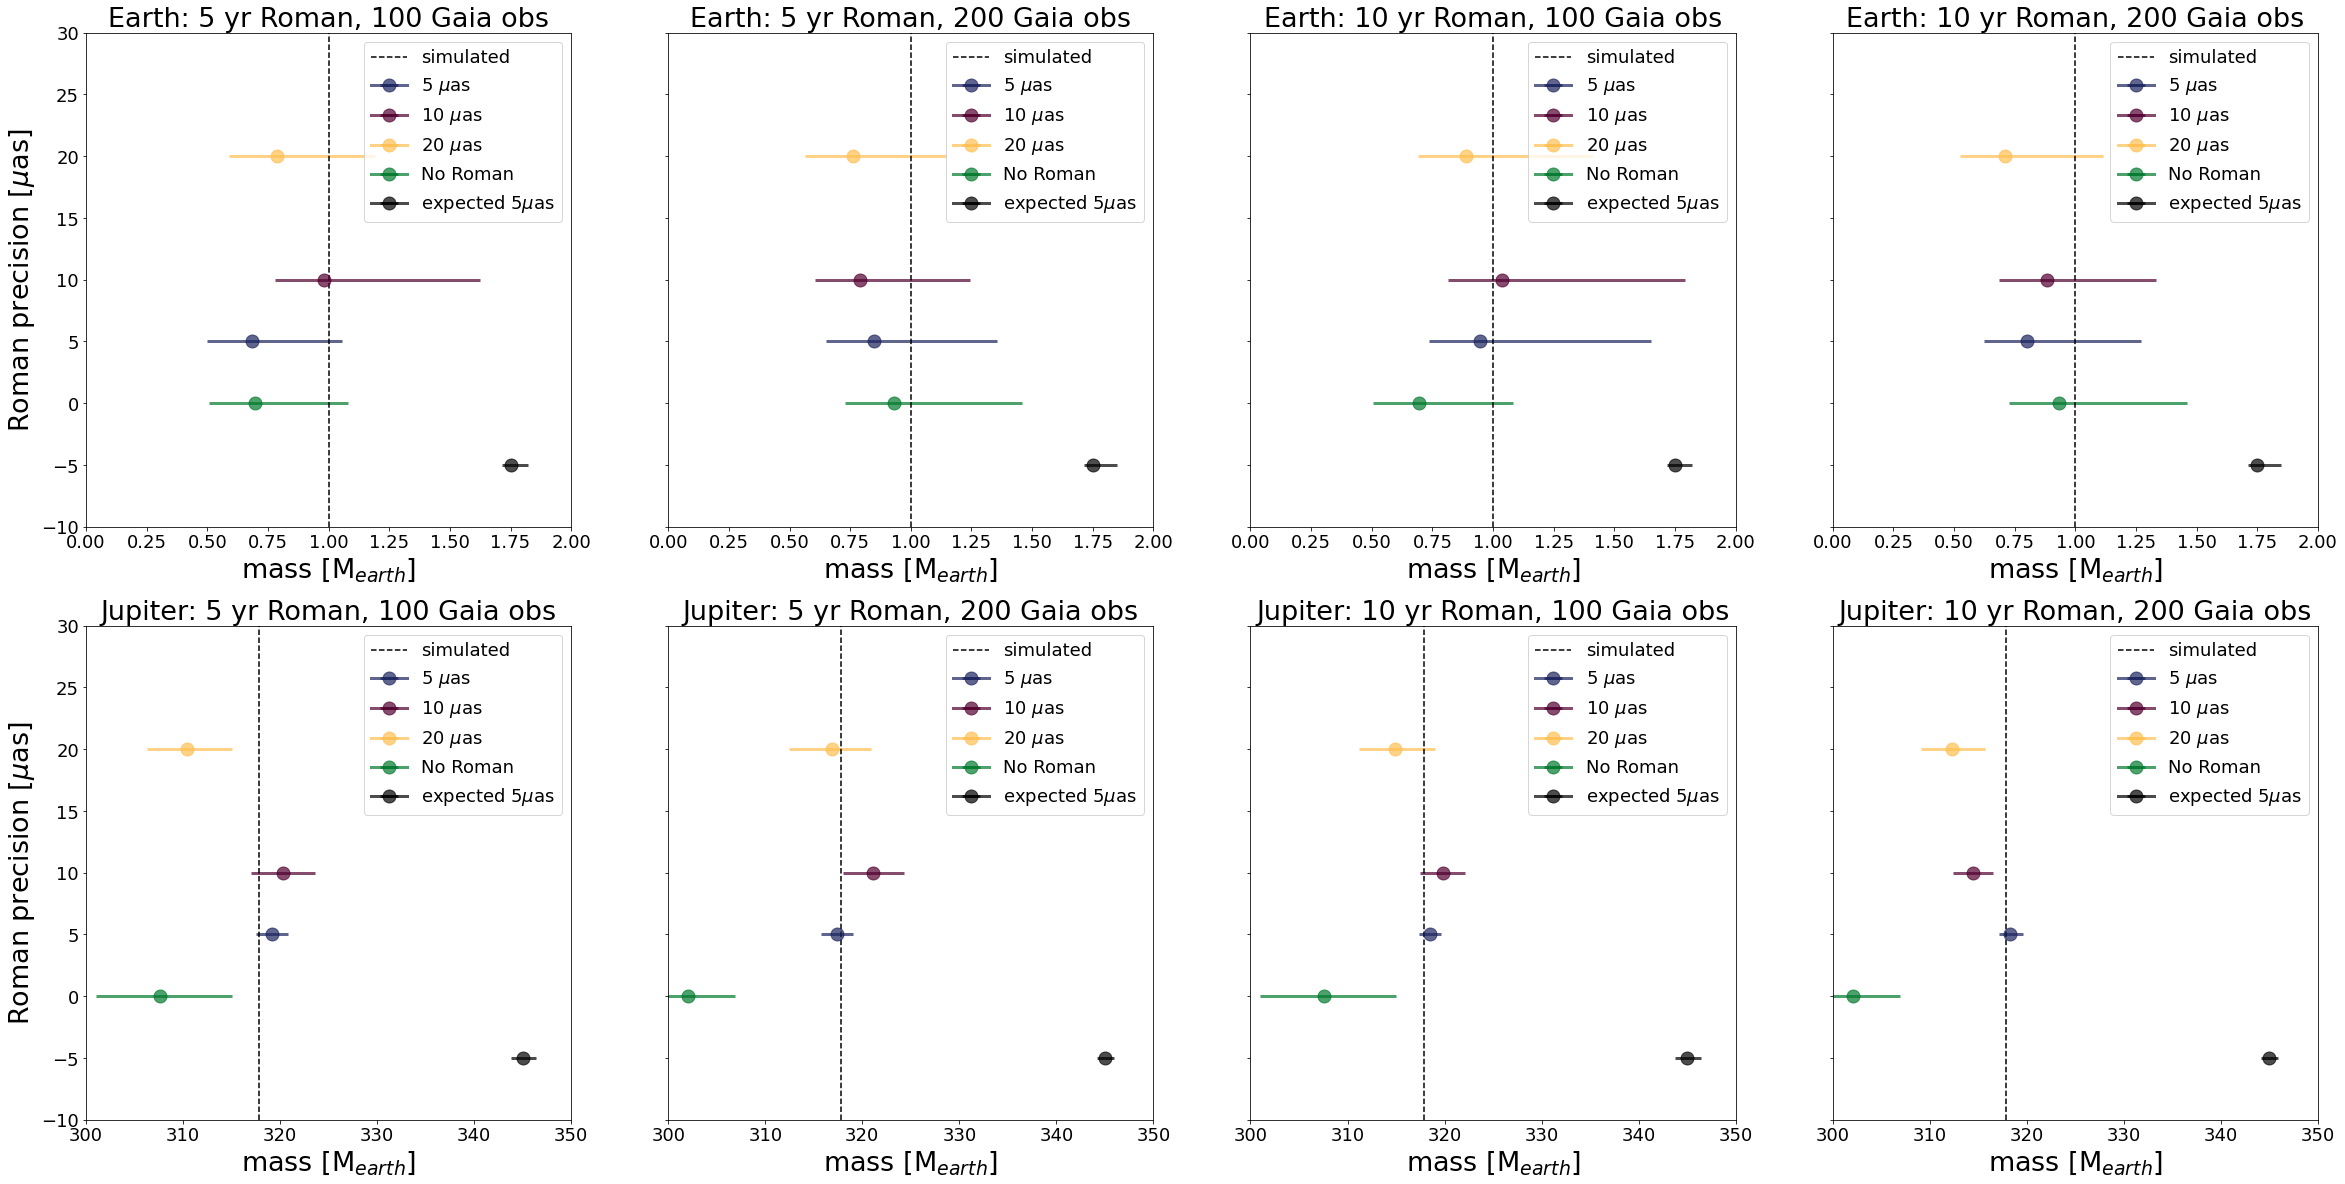

In [44]:

fig, axs = plt.subplots(2, 4, figsize=[40, 20], sharey='row')




xs = params_earth['m_planet']
xs_err = params_earth_err['m_planet']

#ys = params_earth['P']
#ys_err = params_earth_err['P']

roman_errs_quad = [
    r'5 $\mu$as', r'5 $\mu$as', r'5 $\mu$as', r'5 $\mu$as ',
    
    r'10 $\mu$as', r'10 $\mu$as', r'10 $\mu$as', r'10 $\mu$as',
                     
    r'20 $\mu$as', r'20 $\mu$as', r'20 $\mu$as', r'20 $\mu$as', 
                     
    'No Roman', 'No Roman', 'No Roman', 'No Roman'
                     ]


    
plot_index = -1
for ii in range(0, len(files)):
    if plot_index < 3:
        plot_index += 1
    else:
        plot_index = 0
        
        
    if ii < 4:
        y = 5
        
    elif ii < 8:
        y = 10
        
    elif ii < 12:
        y = 20
        
    elif ii < 16:
        y = 0
    
    x = xs[ii]
    x_err = xs_err[ii]
    #y = ys[ii] + diff
    
    roman_err = roman_errs_quad[ii]
    color = colors[ii]
    
    axs[0][plot_index].errorbar(x, y, xerr=x_err, marker = 'o', 
                    color = color, label = roman_err, markersize=13,
                   linewidth = 3, alpha = 0.7)
    
for ii in range(0, 4):
    axs[0][ii].errorbar(1.75, -5, xerr=expected_earth_errs[ii], marker = 'o', 
                    color = 'k', label = r'expected 5$\mu$as', markersize=13,
                   linewidth = 3, alpha = 0.7)

axs[0][0].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[0][1].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[0][2].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[0][3].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')

#axs[0][0].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[0][1].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[0][2].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[0][3].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')

xmin, xmax = 0, 2
axs[0][0].set_xlim(xmin,xmax)
axs[0][1].set_xlim(xmin,xmax)
axs[0][2].set_xlim(xmin,xmax)
axs[0][3].set_xlim(xmin,xmax)

axs[0][0].set_ylim(-10, 30)

axs[0][0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0][1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0][2].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0][3].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)

axs[0][0].set_ylabel(r'Roman precision [$\mu$as]', fontsize = 27)


axs[0][0].set_title('Earth: 5 yr Roman, 100 Gaia obs', fontsize = 27)
axs[0][1].set_title('Earth: 5 yr Roman, 200 Gaia obs', fontsize = 27)
axs[0][2].set_title('Earth: 10 yr Roman, 100 Gaia obs', fontsize = 27)
axs[0][3].set_title('Earth: 10 yr Roman, 200 Gaia obs', fontsize = 27)

axs[0][0].legend(fontsize = 18, loc=1)
axs[0][1].legend(fontsize = 18, loc=1)
axs[0][2].legend(fontsize = 18, loc=1)
axs[0][3].legend(fontsize = 18, loc=1)












xs = params_jup['m_planet']
xs_err = params_jup_err['m_planet']

#ys = params_jup['P']
#ys_err = params_jup_err['P']


roman_errs_quad = [
    r'5 $\mu$as', r'5 $\mu$as', r'5 $\mu$as', r'5 $\mu$as ',
    
    r'10 $\mu$as', r'10 $\mu$as', r'10 $\mu$as', r'10 $\mu$as',
                     
    r'20 $\mu$as', r'20 $\mu$as', r'20 $\mu$as', r'20 $\mu$as', 
                     
    'No Roman', 'No Roman', 'No Roman', 'No Roman'
                     ]

    
    
plot_index = -1
for ii in range(0, len(files)):
    if plot_index < 3:
        plot_index += 1
    else:
        plot_index = 0
        
        
    if ii < 4:
        y = 5
        
    elif ii < 8:
        y = 10
        
    elif ii < 12:
        y = 20
        
    elif ii < 16:
        y = 0
    
    x = xs[ii]
    x_err = xs_err[ii]
    #y = ys[ii] + diff
    
    roman_err = roman_errs_quad[ii]
    color = colors[ii]
    
    
    axs[1][plot_index].errorbar(x, y, xerr=x_err, marker = 'o', 
                    color = color, label = roman_err, markersize=13,
                   linewidth = 3, alpha = 0.7)
    
for ii in range(0, 4):
    axs[1][ii].errorbar(345, -5, xerr=expected_jup_errs[ii], marker = 'o', 
                    color = 'k', label = r'expected 5$\mu$as', markersize=13,
                   linewidth = 3, alpha = 0.7)


axs[1][0].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[1][1].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[1][2].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')
axs[1][3].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--', label = 'simulated')

#axs[1][0].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[1][1].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[1][2].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
#axs[1][3].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')

xmin, xmax = 300, 350
axs[1][0].set_xlim(xmin,xmax)
axs[1][1].set_xlim(xmin,xmax)
axs[1][2].set_xlim(xmin,xmax)
axs[1][3].set_xlim(xmin,xmax)

axs[1][0].set_ylim(-10, 30)

axs[1][0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1][1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1][2].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1][3].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)

axs[1][0].set_ylabel(r'Roman precision [$\mu$as]', fontsize = 27)


axs[1][0].set_title('Jupiter: 5 yr Roman, 100 Gaia obs', fontsize = 27)
axs[1][1].set_title('Jupiter: 5 yr Roman, 200 Gaia obs', fontsize = 27)
axs[1][2].set_title('Jupiter: 10 yr Roman, 100 Gaia obs', fontsize = 27)
axs[1][3].set_title('Jupiter: 10 yr Roman, 200 Gaia obs', fontsize = 27)

axs[1][0].legend(fontsize = 18, loc=1)
axs[1][1].legend(fontsize = 18, loc=1)
axs[1][2].legend(fontsize = 18, loc=1)
axs[1][3].legend(fontsize = 18, loc=1)



fig.show()
#fig.savefig('./final_figures/MvP_earth2.pdf')



./traces/Sep22/period4327_inc45_gaia60_roman5_10.pkl
./traces/Oct27/period4327_inc45_gaia60_roman5_10.pkl
./traces/Nov9/2Me_period4327_inc45_gaia60_roman5_10.pkl
./traces/Nov10/4Me_period4327_inc45_gaia60_roman5_10.pkl
./traces/Nov11/3Me_period4327_inc45_gaia60_roman5_10.pkl


In [174]:
def plot_comparison_masses(folders, filenames, roman_precision, roman_duration):
    earth_mass = [1., 1., 2., 4., 3.]
    periods = [4327]
    incs = [45.]
    roman_errs = [roman_precision]
    roman_durations = [roman_duration]


    params_earth = defaultdict(list)
    params_jup = defaultdict(list)
    params_earth_err = defaultdict(list)
    params_jup_err = defaultdict(list)
    for ii in range(0, len(folders)):
        index = -1
        files = filenames[ii]
        folder = folders[ii]
        for period_jup in periods:
            for inc_earth in incs:
                for roman_err in roman_errs:
                    for roman_duration in roman_durations:
                        index += 1
                        file = files[index]




                        with open(folder+file, 'rb') as buff:
                            data = pickle.load(buff)  

                        model, trace = data['model'], data['trace']

                        parameters = ["m_planet", "P"]

                        #print("")
                        #print("true values:")
                        #print("Jupiter period = " + str(period_jup))
                        #print("Earth inclindation = " + str(np.radians(inc_earth)))
                        #print("")


                        print(folder+file)
                        for param in parameters:


                            planet1_med = np.median(trace.posterior[param].values[:, :, 0])
                            planet2_med = np.median(trace.posterior[param].values[:, :, 1])

                            planet1_quantile = [np.quantile(trace.posterior[param].values[:, :, 0], 0.16),
                                                np.quantile(trace.posterior[param].values[:, :, 0], 0.84)]

                            planet2_quantile = [np.quantile(trace.posterior[param].values[:, :, 1], 0.16),
                                                np.quantile(trace.posterior[param].values[:, :, 1], 0.84)]

                            planet1_err = np.array([
                                [planet1_med - planet1_quantile[0]  ],
                                [planet1_quantile[1] - planet1_med]
                            ])

                            planet2_err = np.array([
                                [planet2_med - planet2_quantile[0]  ],
                                [planet2_quantile[1] - planet2_med]
                            ])



                            params_earth[param].append(planet1_med)
                            params_jup[param].append(planet2_med)

                            params_earth_err[param].append(planet1_err)
                            params_jup_err[param].append(planet2_err)








    ####################################################################################
    ####################################################################################
    ############################  plot   ###############################################
    ####################################################################################
    ####################################################################################



    xs = params_earth['m_planet']
    xs_err = params_earth_err['m_planet']

    print(xs)

    ys = params_earth['P']
    ys_err = params_earth_err['P']

    roman_errs_double = ['No Roman Data', 'No Roman Data', 
                         r'20 $\mu$as precision', r'20 $\mu$as precision', 
                         r'10 $\mu$as precision', r'10 $\mu$as precision', 
                         r'5 $\mu$as precision', r'5 $\mu$as precision']


    fig, axs = plt.subplots(1, 1, figsize=[18, 13], sharey=True)


    colors = [
        "#1c245f", 
        "#530031", 
        "#ffc052", 
        "#01792d",
        "#777acd"
    ]



    index = -1
    masses = [1, 1, 2, 4, 3]
    for ii in range(0, len(folders)):
        mass = masses[ii]
        for jj in range(0, len(files)):    
            index += 1

            x = xs[index]
            x_err = xs_err[index]
            y = ys[index]
            y_err = ys_err[index]

            roman_err = roman_errs_double[jj]
            color = colors[ii]

            axs.errorbar(x-mass, y-300, xerr=x_err, yerr = y_err, marker = 'o', 
                                color = color, label = r'M$_E$ = ' + str(int(earth_mass[ii])) + 'M$_E$', 
                                markersize=13, linewidth = 3, alpha = 0.7)

    axs.axvline(x=0, ymin=0, ymax=1, ls = '--', color = 'k')

    
    axs.axhline(y=0, xmin=0, xmax=1, color = 'k', ls = '--')

    #axs.set_ylim(np.min(ys)*.99-300, np.max(ys)*1.01-300)
    axs.set_ylim(-5, 5)
    axs.set_xlim(-2, 10)

    axs.set_xlabel(r'mass residual [M$_{earth}$]', fontsize = 27)
    axs.set_ylabel(r'period residual [days]', fontsize = 27)

    #axs.set_xscale('log')
    
    
    if roman_duration != None:
        axs.set_title(r'Earth: ' + str(int(roman_precision*1e6)) + '$\mu$as Precision, ' + str(int(roman_duration)) + ' year Roman Program', fontsize = 27)
        #fig.savefig('final_figures/compare_masses/' + str(int(roman_precision*1e6)) + 'microas' + str(int(roman_duration)) + 'yrs.pdf')
    else:
        axs.set_title(r'Earth: No Roman', fontsize = 27)
        #fig.savefig('final_figures/compare_masses/no_roman.pdf')

    axs.legend(fontsize = 18, loc=1)


    fig.show()

./traces/Sep22/period4327_inc45_gaia60_romanNA.pkl
./traces/Oct27/period4327_inc45_gaia60_romanNA.pkl
./traces/Nov9/2Me_period4327_inc45_gaia60_romanNA.pkl
./traces/Nov10/4Me_period4327_inc45_gaia60_romanNA.pkl
./traces/Nov11/3Me_period4327_inc45_gaia60_romanNA.pkl
[4.524990623708748, 15.96925320314125, 6.144337480467802, 6.097244296370415, 5.020539417874043]


<ipython-input-174-90af5aa80980>:158: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


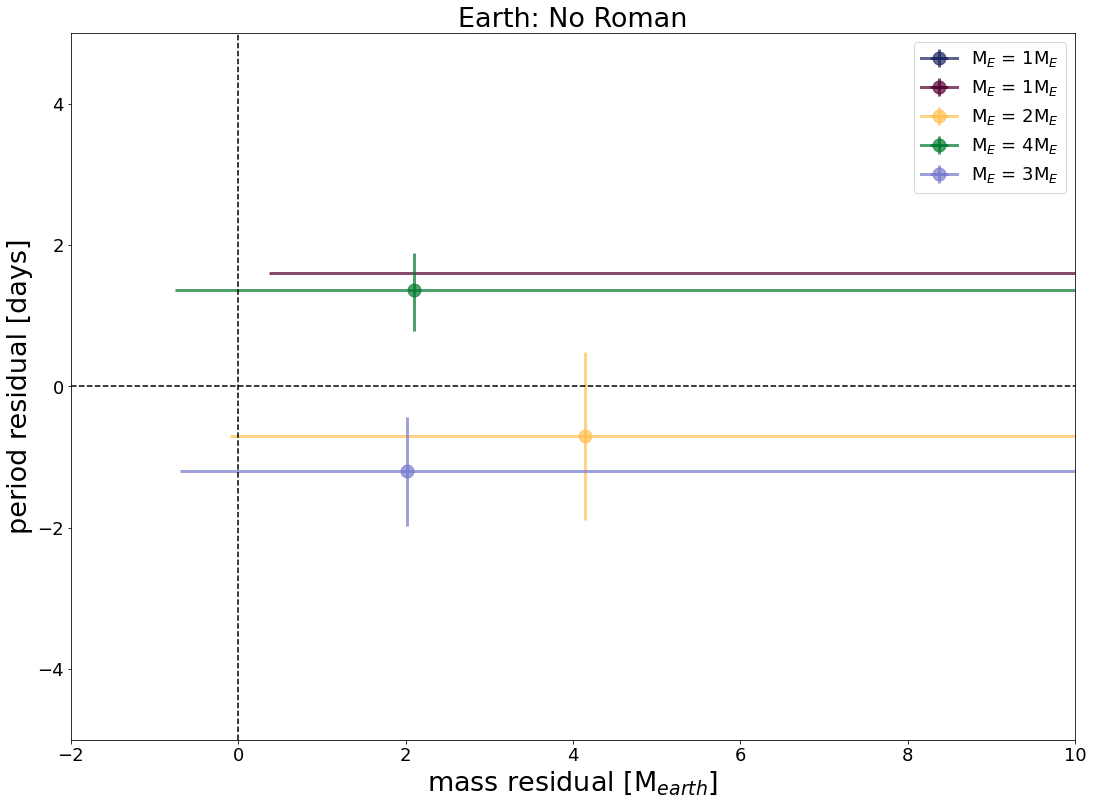

In [178]:
folders = [
    './traces/Sep22/',
    './traces/Oct27/',
    './traces/Nov9/',
    './traces/Nov10/',
    './traces/Nov11/'
]

filenames = [[
    'period4327_inc45_gaia60_romanNA.pkl'
],
[
    'period4327_inc45_gaia60_romanNA.pkl'
],
[
    '2Me_period4327_inc45_gaia60_romanNA.pkl',
],
[
    '4Me_period4327_inc45_gaia60_romanNA.pkl',
],
[
    '3Me_period4327_inc45_gaia60_romanNA.pkl',
]]

plot_comparison_masses(folders, filenames, None, None)